In [1]:
#loading data and read the file into a pandas DataFrame

import pandas as pd
file_name = r'D:\ml_support_ticket_pipeline\data\ai_dev_assignment_tickets_complex_1000.xls'
df = pd.read_excel(file_name)
df.head()


,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,2,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,5,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [2]:
#initial dataFrame inspection

In [3]:
print("--- DataFrame Shape ---")
print(df.shape)


--- DataFrame Shape ---
(1000, 5)


In [4]:
print("--- DataFrame Info ---")
df.info()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_id      1000 non-null   int64 
 1   ticket_text    945 non-null    object
 2   issue_type     924 non-null    object
 3   urgency_level  948 non-null    object
 4   product        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [5]:
print("--- Column Names ---")
print(df.columns)

--- Column Names ---
Index(['ticket_id', 'ticket_text', 'issue_type', 'urgency_level', 'product'], dtype='object')


In [6]:
print("--- Missing values Count Per Column ---")
print(df.isnull().sum())

--- Missing values Count Per Column ---
ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64


In [7]:
print("--- Duplicate Rows Count ---")
print(f"Total duplicated rows: {df.duplicated().sum()}")

--- Duplicate Rows Count ---
Total duplicated rows: 0


In [8]:
print("--- Distribution of issue_type ---")
print(df['issue_type'].value_counts())

--- Distribution of issue_type ---
issue_type
Billing Problem       146
General Inquiry       146
Account Access        143
Installation Issue    142
Product Defect        121
Wrong Item            114
Late Delivery         112
Name: count, dtype: int64


In [9]:
print("--- Distribution of urgency_level ---")
print(df['urgency_level'].value_counts())

--- Distribution of urgency_level ---
urgency_level
High      330
Medium    319
Low       299
Name: count, dtype: int64


In [10]:
print("--- Unique Products ---")
print(df['product'].value_counts())

--- Unique Products ---
product
RoboChef Blender     116
Vision LED TV        109
PhotoSnap Cam        103
FitRun Treadmill     102
PowerMax Battery     102
EcoBreeze AC         100
ProTab X1             99
SmartWatch V2         95
SoundWave 300         90
UltraClean Vacuum     84
Name: count, dtype: int64


In [11]:
#Visualizing the distribution of 'issue_type'

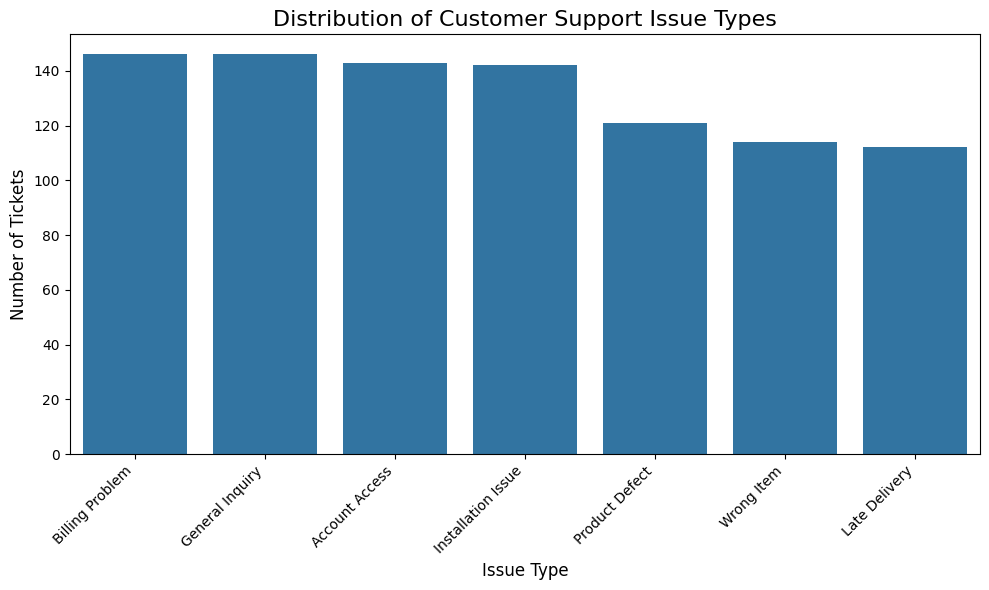

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='issue_type', order= df['issue_type'].value_counts().index)
plt.title('Distribution of Customer Support Issue Types',fontsize=16)
plt.xticks(rotation=45, ha='right')   #rotating x-axis labels for better visibility 

plt.xlabel('Issue Type', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)

plt.tight_layout()  #ensuring the layout is tight
plt.show()


In [13]:
#Visualizing the distribution of 'urgency_level'

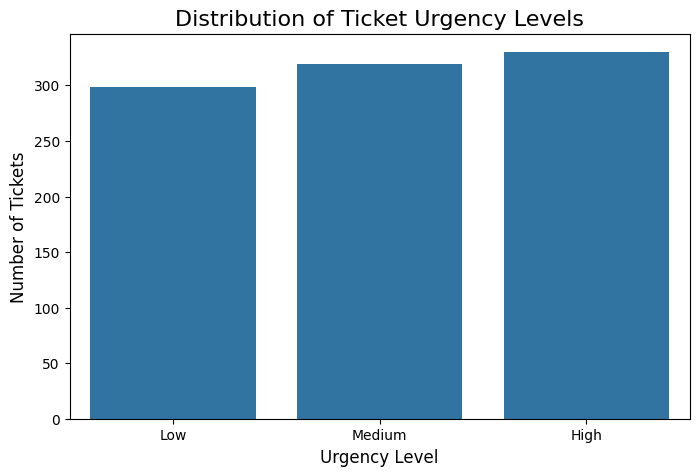

In [14]:
plt.figure(figsize=(8,5))
urgency_order = ['Low','Medium','High']
sns.countplot(data= df.dropna(subset=['urgency_level']), x='urgency_level', order = urgency_order)

plt.title('Distribution of Ticket Urgency Levels', fontsize=16)

plt.xlabel('Urgency Level', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)

plt.show()

In [15]:
# Handling the Missing values
# Since almost every coloumn, including the target variables - 'issue_type' and 'urgency_level'also have mising values, developing a comprehensive strategy for all missing data

# 'ticket_id : just an identifier, won't be used as a feature
# 'ticket_text': primary feature, very important for analysis
# 'issue_type': First target variable
# 'urgency_level':Second target variable
# 'product' : Both Feature and Target for entity extractionn

# A row is only useful for training a specific model if it has both its features and its target label.
# For "Issue Type Classifier" , a row is useless if ticket_text is missing OR issue_type is missing.
# For "Urgency Level Classifier" , a row is useless if ticket_text is missing OR urgency_level is missing.

In [16]:
# Comprehensive strategy for all missing data 

# drop any row that has a missing value in any of the critical columns (ticket_text, issue_type, urgency_level, product).

In [17]:
print("--- Shape of DataFrame before cleaning ---")
print(df.shape)
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

--- Shape of DataFrame before cleaning ---
(1000, 5)

Missing Values Before Cleaning:
ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64


In [18]:
critical_columns =  ['ticket_text', 'issue_type', 'urgency_level', 'product']  # Columns that are essential for analysis
df_cleaned = df.dropna(subset = critical_columns)

In [19]:
print("--- Shape of DataFrame after cleaning ---")
print(df_cleaned.shape)
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

--- Shape of DataFrame after cleaning ---
(826, 5)

Missing values after cleaning:
ticket_id        0
ticket_text      0
issue_type       0
urgency_level    0
product          0
dtype: int64


In [20]:
df_cleaned = df_cleaned.reset_index(drop=True)
print("First 5 rows of the cleaned DataFrame:")
df_cleaned.head()

First 5 rows of the cleaned DataFrame:


,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
2,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
3,6,Can you tell me more about the PhotoSnap Cam w...,General Inquiry,Medium,PhotoSnap Cam
4,7,is malfunction. It stopped working after just...,Product Defect,Low,EcoBreeze AC


In [21]:
# Text preprocessing 
# cleaning the 'ticket_text' column and converting to a standardized format

In [22]:
import re
import nltk
nltk.download('punkt_tab') # for tokenization
nltk.download('stopwords')  # for stopwords
nltk.download('wordnet')  # for lemmatization
nltk.download('omw-1.4')  #companion for wordnet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#creating python function to do the process of text cleaning

def preprocess_text(text):
    #lowercase handling and removing special characters

    text = re.sub(r'[^a-zA-Z\s]','',text, re.I | re.A)
    text = text.lower()
    text = text.strip()

    #tokenizing 

    tokens = word_tokenize(text)

    #lemmatization and removal of stop words

    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]

    #join back to string

    return " ".join(processed_tokens)

df_cleaned['processed_text'] = df_cleaned['ticket_text'].apply(preprocess_text)
df_cleaned[['ticket_text', 'processed_text']].head()
    

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,ticket_text,processed_text
0,Payment issue for my SmartWatch V2. I was unde...,payment issue smartwatch underbilled order
1,I ordered SoundWave 300 but got EcoBreeze AC i...,ordered soundwave got ecobreeze instead order ...
2,Facing installation issue with PhotoSnap Cam. ...,facing installation issue photosnap cam setup ...
3,Can you tell me more about the PhotoSnap Cam w...,tell photosnap cam warranty also available red
4,is malfunction. It stopped working after just...,malfunction stopped working day


In [23]:
# Feature Engineering
# Vectorization of the text data using TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

#defining primary feature set
X_text = df_cleaned['processed_text'] 
X_text.fillna("", inplace=True) #safety check for any empty strings after processing

print("--- Sample of processed text to be vectorized ---")
X_text.head()


--- Sample of processed text to be vectorized ---


0           payment issue smartwatch underbilled order
1    ordered soundwave got ecobreeze instead order ...
2    facing installation issue photosnap cam setup ...
3       tell photosnap cam warranty also available red
4                      malfunction stopped working day
Name: processed_text, dtype: object

In [25]:
# initializing the tf-idf vectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))

# fitting the vectorizer to the data and transforming the text into numerical matrix

X_tfidf = tfidf_vectorizer.fit_transform(X_text)

#inspecting the results
print("Type of the output:", type(X_tfidf))
print("Shape of the TF-IDF feature matrix (rows, features):", X_tfidf.shape)

Type of the output: <class 'scipy.sparse._csr.csr_matrix'>
Shape of the TF-IDF feature matrix (rows, features): (826, 515)


In [26]:
# Creating additional features

In [27]:
from textblob import TextBlob
import numpy as np
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

#ticket_length (No.of words)
df_cleaned['ticket_length'] = df_cleaned['ticket_text'].apply(lambda x: len(x.split()))

#sentiment score (polarity)
df_cleaned['sentiment_polarity'] = df_cleaned['ticket_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#inspecting new features
print("DataFrame with new features:")
print(df_cleaned[['ticket_text', 'ticket_length', 'sentiment_polarity']].head())

#re-run tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['processed_text'])

# preparing the additional features for merging by converting them to a numpy array
additional_features = df_cleaned[['ticket_length', 'sentiment_polarity']].values

#scaling numerical features
scaler = StandardScaler()
additional_features_scaled = scaler.fit_transform(additional_features)

print("Shape of TF-IDF matrix:", X_tfidf.shape)
print("Shape of additional features matrix:", additional_features_scaled.shape)

# Combining TF-IDF features with the new numerical features
X_combined = hstack([X_tfidf, additional_features_scaled])

print("Type of the combined feature set:", type(X_combined))
print("Shape of the final combined feature matrix:", X_combined.shape)

DataFrame with new features:
                                         ticket_text  ticket_length  \
0  Payment issue for my SmartWatch V2. I was unde...             12   
1  I ordered SoundWave 300 but got EcoBreeze AC i...             14   
2  Facing installation issue with PhotoSnap Cam. ...             11   
3  Can you tell me more about the PhotoSnap Cam w...             16   
4   is malfunction. It stopped working after just...              9   

   sentiment_polarity  
0                 0.0  
1                 0.0  
2                -0.5  
3                 0.3  
4                 0.0  
Shape of TF-IDF matrix: (826, 515)
Shape of additional features matrix: (826, 2)
Type of the combined feature set: <class 'scipy.sparse._coo.coo_matrix'>
Shape of the final combined feature matrix: (826, 517)


In [28]:
#splitting the final combined data

In [29]:
from sklearn.model_selection import train_test_split

y_issue = df_cleaned['issue_type']
y_urgency = df_cleaned['urgency_level']

# split data for the issue_type classifier (Model1)
X_train_issue, X_test_issue, y_train_issue, y_test_issue = train_test_split(
    X_combined, 
    y_issue,
    test_size=0.2,
    random_state=42,
    stratify=y_issue
)
# split data for the urgecny_level classifier (Model2)
X_train_urgency, X_test_urgency, y_train_urgency, y_test_urgency = train_test_split(
    X_combined,       
    y_urgency,
    test_size=0.2,
    random_state=42,
    stratify=y_urgency
)
print("Shape of X_train_issue:", X_train_issue.shape)
print("Shape of X_test_issue:", X_test_issue.shape)
    

Shape of X_train_issue: (660, 517)
Shape of X_test_issue: (166, 517)


In [30]:
# Build , Train and Evaluation of Model1 (Issue type Classifier)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# initializing and training the model1
issue_classifier = LogisticRegression(max_iter=1000, random_state=42)
issue_classifier.fit(X_train_issue, y_train_issue)
print("Training complete.")

Training complete.


In [32]:
# make predictions on test Set
y_pred_issue = issue_classifier.predict(X_test_issue)

In [33]:
# Model1 evaluation
print("Classification Report:")
print(classification_report(y_test_issue, y_pred_issue))

Classification Report:
                    precision    recall  f1-score   support

    Account Access       1.00      1.00      1.00        27
   Billing Problem       1.00      1.00      1.00        26
   General Inquiry       1.00      1.00      1.00        25
Installation Issue       1.00      1.00      1.00        26
     Late Delivery       1.00      1.00      1.00        19
    Product Defect       1.00      1.00      1.00        22
        Wrong Item       1.00      1.00      1.00        21

          accuracy                           1.00       166
         macro avg       1.00      1.00      1.00       166
      weighted avg       1.00      1.00      1.00       166



---Confusion Matrix---


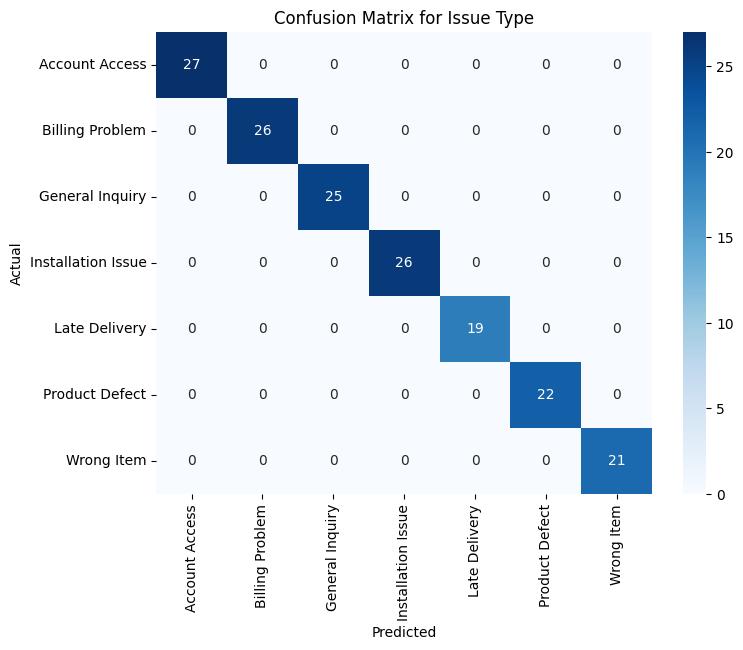

In [34]:
# Visualization of the confusion matrix
print("---Confusion Matrix---")
cm_issue = confusion_matrix(y_test_issue, y_pred_issue)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_issue, annot=True, fmt='d', cmap='Blues', xticklabels=issue_classifier.classes_, yticklabels=issue_classifier.classes_)
plt.title('Confusion Matrix for Issue Type')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [35]:
# The evaluation scores are too perfect, so suspecting data leakage
# diagnosis test for data leakage

# Get a list of the unique issue types
issue_types_list = df_cleaned['issue_type'].unique().tolist()
print("Checking for these keywords:", issue_types_list)

# A function to check if any of the issue types are in the ticket text
def find_leaked_keywords(text, keywords):
    for keyword in keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE):
            return keyword 
    return None 

# Apply this function to the original ticket text
df_cleaned['leaked_keyword_found'] = df_cleaned['ticket_text'].apply(
    lambda text: find_leaked_keywords(text, issue_types_list)
)

leaky_rows = df_cleaned[df_cleaned['leaked_keyword_found'] == df_cleaned['issue_type']]

print(f"Found {len(leaky_rows)} rows where the 'issue_type' label is literally present in the 'ticket_text'.")

if len(leaky_rows) > 0:
    print("\nThis is a major source of data leakage.")
    print("Example leaky rows:")
    print(leaky_rows[['ticket_text', 'issue_type', 'leaked_keyword_found']].head())
else:
    print("No direct leakage of 'issue_type' keywords found in 'ticket_text'")

Checking for these keywords: ['Billing Problem', 'Wrong Item', 'Installation Issue', 'General Inquiry', 'Product Defect', 'Late Delivery', 'Account Access']
Found 120 rows where the 'issue_type' label is literally present in the 'ticket_text'.

This is a major source of data leakage.
Example leaky rows:
                                          ticket_text          issue_type  \
2   Facing installation issue with PhotoSnap Cam. ...  Installation Issue   
5   Facing installation issue with RoboChef Blende...  Installation Issue   
18  Facing installation issue wit Vision LED TV. S...  Installation Issue   
29  Facing installation issue with FitRun Treadmil...  Installation Issue   
33  Facing installation issue with RoboChef Blende...  Installation Issue   

   leaked_keyword_found  
2    Installation Issue  
5    Installation Issue  
18   Installation Issue  
29   Installation Issue  
33   Installation Issue  


In [36]:
# Build , Train and Evaluation of Model2 (Urgency Level Classifier)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#initializing and training the model2
urgency_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
urgency_classifier.fit(X_train_urgency, y_train_urgency)
print("Training complete.")


Training complete.


In [38]:
# making predictions on the test set
y_pred_urgency = urgency_classifier.predict(X_test_urgency)

In [39]:
# Model2 Evaluation
print("Classification Report:")
print(classification_report(y_test_urgency, y_pred_urgency))

Classification Report:
              precision    recall  f1-score   support

        High       0.41      0.36      0.39        58
         Low       0.34      0.40      0.37        52
      Medium       0.30      0.29      0.29        56

    accuracy                           0.35       166
   macro avg       0.35      0.35      0.35       166
weighted avg       0.35      0.35      0.35       166



In [40]:
from sklearn.linear_model import LogisticRegression

print("\n\n--- Testing with a simpler model (Logistic Regression) ---")
urgency_classifier_lr = LogisticRegression(max_iter=1000, random_state=42)
urgency_classifier_lr.fit(X_train_urgency, y_train_urgency)
y_pred_urgency_lr = urgency_classifier_lr.predict(X_test_urgency)

print("\n--- Evaluation for Urgency Level Classifier (Logistic Regression) ---")
print(classification_report(y_test_urgency, y_pred_urgency_lr))



--- Testing with a simpler model (Logistic Regression) ---

--- Evaluation for Urgency Level Classifier (Logistic Regression) ---
              precision    recall  f1-score   support

        High       0.35      0.40      0.37        58
         Low       0.38      0.33      0.35        52
      Medium       0.34      0.34      0.34        56

    accuracy                           0.36       166
   macro avg       0.36      0.35      0.35       166
weighted avg       0.36      0.36      0.35       166



In [41]:
# testing with a simpler model also failed to give an accurate result, since this is an analysis, I am tend to analyze the feature importance

In [42]:
# feature importance analysis 
import pandas as pd
tfidf_feature_names = list(tfidf_vectorizer.get_feature_names_out())
additional_feature_names = ['ticket_length', 'sentiment_polarity']
all_feature_names = tfidf_feature_names + additional_feature_names
importances = urgency_classifier.feature_importances_

if len(all_feature_names) == len(importances):
    feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    print("--- Top 20 Most Important Features for Predicting Urgency ---")
    print(feature_importance_df.head(20))
else:
    print("Error: Lengths still do not match. Please re-run the cells in order.")
    print(f"Number of names: {len(all_feature_names)}")
    print(f"Number of scores: {len(importances)}")

--- Top 20 Most Important Features for Predicting Urgency ---
                feature  importance
515       ticket_length    0.021515
271               order    0.016827
161                 got    0.012560
186               issue    0.012484
109                 day    0.012030
289             ordered    0.011553
371          smartwatch    0.011464
8                  also    0.010961
358            response    0.010009
516  sentiment_polarity    0.009860
248               march    0.009770
507             working    0.009654
11                april    0.009447
416     stopped working    0.009139
120           ecobreeze    0.008976
306             payment    0.008973
307       payment issue    0.008578
509         working day    0.008482
445           treadmill    0.008450
214                late    0.008241


In [43]:
"""
Urgency Model: Final Analysis
The Urgency Level Classifier consistently scored a low F1-score of ~0.35 with both RandomForest and Logistic Regression. Feature importance analysis confirmed that the model was not picking up on strong, intuitive "urgent" keywords.
An attempt to engineer specific lexicon-based features (counting words like 'urgent', 'broken', etc.) also failed to improve performance.
Conclusion: The features available in this dataset, using traditional NLP techniques, are insufficient to reliably predict urgency. This suggests the signals for urgency are either too complex for this type of model or the original labels are noisy. 
Further improvements would require advanced models beyond the scope of this task. So that Proceeding to Entity Extraction.
"""

'\nUrgency Model: Final Analysis\nThe Urgency Level Classifier consistently scored a low F1-score of ~0.35 with both RandomForest and Logistic Regression. Feature importance analysis confirmed that the model was not picking up on strong, intuitive "urgent" keywords.\nAn attempt to engineer specific lexicon-based features (counting words like \'urgent\', \'broken\', etc.) also failed to improve performance.\nConclusion: The features available in this dataset, using traditional NLP techniques, are insufficient to reliably predict urgency. This suggests the signals for urgency are either too complex for this type of model or the original labels are noisy. \nFurther improvements would require advanced models beyond the scope of this task. So that Proceeding to Entity Extraction.\n'

In [44]:
# Entity extraction

In [45]:
# Getting ready the knowledge base
# already have product list containing unique values from the product column

import re 
product_list = df_cleaned['product'].unique().tolist()
print(f"Known Products: {product_list[:5]}...") 

# defining complaint keywords list
complaint_keywords = [
    'broken', 'defective', 'faulty', 'not working', 'fail', 'failed',
    'error', 'crash', 'slow', 'issue', 'problem',
    'late', 'delayed', 'missing', 'wrong item', 'incorrect'
]
print(f"Complaint Keywords: {complaint_keywords[:5]}...")

Known Products: ['SmartWatch V2', 'SoundWave 300', 'PhotoSnap Cam', 'EcoBreeze AC', 'RoboChef Blender']...
Complaint Keywords: ['broken', 'defective', 'faulty', 'not working', 'fail']...


In [49]:
# defining the entity extraction function
import re
import json

product_list = df_cleaned['product'].unique().tolist()

complaint_keywords = [
    'broken', 'defective', 'faulty', 'not working', 'fail', 'failed',
    'error', 'crash', 'slow', 'issue', 'problem',
    'late', 'delayed', 'missing', 'wrong item', 'incorrect'
]

def extract_entities(text):
    extracted_entities = {
        "products": [],
        "dates": [],
        "complaint_keywords": []
    }
    
    found_products = set()
    for product in product_list:
        if re.search(r'\b' + re.escape(product) + r'\b', text, re.IGNORECASE):
            found_products.add(product)
    extracted_entities["products"] = list(found_products)

    date_pattern = r'\b(?:\d{4}-\d{1,2}-\d{1,2}|\d{1,2}/\d{1,2}/\d{4}|\w+\s\d{1,2}(?:st|nd|rd|th)?(?:,\s\d{4})?|\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*\s\d{1,2})\b'
    extracted_entities["dates"] = re.findall(date_pattern, text, re.IGNORECASE)

    found_keywords = set()
    for keyword in complaint_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE):
            found_keywords.add(keyword.lower())
    extracted_entities["complaint_keywords"] = list(found_keywords)
    
    return extracted_entities

# --- Test Run ---
test_text = "FitRun Treadmill is lost. It stopped working after just 3 days. Also, I contacted support on 08 May but got no response"
found_entities = extract_entities(test_text)

print(f"--- Entities found in: '{test_text}' ---")
print(json.dumps(found_entities, indent=4))

--- Entities found in: 'FitRun Treadmill is lost. It stopped working after just 3 days. Also, I contacted support on 08 May but got no response' ---
{
    "products": [
        "FitRun Treadmill"
    ],
    "dates": [
        "just 3",
        "on 08"
    ],
    "complaint_keywords": []
}


In [ ]:
"""While the keyword-based approach is a good starting point, it is not robust. 
The small, fixed list of keywords cannot scale to the variety of user expressions in a large dataset. 
To build a more flexible and accurate system, I will proceed with a more advanced method using grammatical pattern matching (POS tagging and chunking)."""

In [48]:
# advanced entity extraction using POS tagging and chunking.

import re
import nltk
nltk.download('averaged_perceptron_tagger_eng')
import json

product_list = df_cleaned['product'].unique().tolist()

def extract_entities_advanced(text):
    extracted_entities = {
        "products": [],
        "dates": [],
        "complaint_phrases": []
    }

    grammar = r"NP: {<JJ.*>*<NN.*>+}"
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    chunk_parser = nltk.RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)
    
    found_products = set()
    for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
        potential_product = " ".join(word for word, tag in subtree.leaves())
        for known_product in product_list:
            if known_product.lower() in potential_product.lower():
                found_products.add(known_product)
    extracted_entities["products"] = list(found_products)

    date_pattern = r'\b(?:\d{4}-\d{1,2}-\d{1,2}|\d{1,2}/\d{1,2}/\d{4}|(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*\s\d{1,2}(?:st|nd|rd|th)?(?:,?\s\d{4})?|\d{1,2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*(?:,?\s\d{4})?)\b'
    extracted_entities["dates"] = re.findall(date_pattern, text, re.IGNORECASE)

    complaint_grammar = r"VP: {<VB.*>+<RB|RP|JJ|VBN|VBG>*}"
    complaint_parser = nltk.RegexpParser(complaint_grammar)
    complaint_tree = complaint_parser.parse(pos_tags)
    
    complaint_phrases = set()
    root_complaint_words = ['broken', 'defective', 'faulty', 'working', 'fail', 'error', 'crash', 'slow', 'late', 'delayed', 'missing', 'lost', 'unresponsive']
    
    for subtree in complaint_tree.subtrees(filter=lambda t: t.label() == 'VP'):
        phrase_words = [word for word, tag in subtree.leaves()]
        if any(root_word in phrase_words for root_word in root_complaint_words):
            complaint_phrases.add(" ".join(phrase_words))
    extracted_entities["complaint_phrases"] = list(complaint_phrases)

    return extracted_entities

#Test Run
test_text = "FitRun Treadmill is lost. It stopped working after just 3 days. Also, I contacted support on 08 May but got no response"
found_entities = extract_entities_advanced(test_text)

print(f"--- Advanced Entities found in: '{test_text}' ---")
print(json.dumps(found_entities, indent=4))

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


--- Advanced Entities found in: 'FitRun Treadmill is lost. It stopped working after just 3 days. Also, I contacted support on 08 May but got no response' ---
{
    "products": [
        "FitRun Treadmill"
    ],
    "dates": [
        "08 May"
    ],
    "complaint_phrases": [
        "is lost",
        "stopped working"
    ]
}


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


In [ ]:
# Integration
# function that takes raw ticket_text as input and returns:
# Predicted issue_type
# Predicted urgency_level
# Extracted entities (as a JSON/dictionary)

In [50]:
from textblob import TextBlob
from scipy.sparse import hstack
import json

def process_ticket(raw_text):
    
    processed_text_for_model = preprocess_text(raw_text)
    
    text_tfidf = tfidf_vectorizer.transform([processed_text_for_model])
    
    ticket_len = len(raw_text.split())
    sentiment = TextBlob(raw_text).sentiment.polarity
    
    additional_features = scaler.transform([[ticket_len, sentiment]])
    
    combined_features = hstack([text_tfidf, additional_features])
    
    predicted_issue = issue_classifier.predict(combined_features)[0]
    predicted_urgency = urgency_classifier.predict(combined_features)[0]
    
    extracted_entities = extract_entities_advanced(raw_text)

    final_result = {
        "predicted_issue_type": predicted_issue,
        "predicted_urgency_level": predicted_urgency,
        "entities": extracted_entities
    }
    
    return final_result

#Test Run
new_ticket = "I ordered a FitRun Treadmill on 2023-11-10 and it still has not arrived. This delay is unacceptable and the tracking number is not working. This is a very late delivery!"

ticket_analysis = process_ticket(new_ticket)

print("--- Analysis of New Ticket ---")
print(json.dumps(ticket_analysis, indent=4))

--- Analysis of New Ticket ---
{
    "predicted_issue_type": "Late Delivery",
    "predicted_urgency_level": "Medium",
    "entities": {
        "products": [
            "FitRun Treadmill"
        ],
        "dates": [
            "2023-11-10"
        ],
        "complaint_phrases": [
            "is not working"
        ]
    }
}


In [ ]:
# saving the models and other artifacts with joblib

In [51]:
import joblib

joblib.dump(issue_classifier, 'issue_classifier.joblib')
joblib.dump(urgency_classifier, 'urgency_classifier.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(product_list, 'product_list.joblib')

['product_list.joblib']